This is a place to experiment with finding a multinomial that can sample from a given function... 

First define a multinomial. 

I think, by definition, we can define a multinomial by making a list of positive numbers that add-up to 1, $P$. Then:

1. Construct the cumulative probability list, $C_i$.

1. Draw from a uniform, $U(0,1)$.

1. The result is $i$, with $C_{i+1} < x < C_{i-1}$.

Then, the collection of $i$ follows a the multinomial with probabilities given by $P$.

In [1]:
import numpy as np

import matplotlib
#matplotlib.use('WebAgg')
#matplotlib.use('Qt4Cairo')
#matplotlib.use('Qt5Cairo')
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

In [2]:
def multinomial_rec(P,dim,i=0,accumulate=0,x=None):
    '''Recursive implementation of multinomial'''

    if i==0:
        x=np.random.rand()
        accumulate+=P[0]
    
    if x<=accumulate:
        return i
    else:
        if i+1==dim-1:
            return dim-1
        return multinomial_rec(P,dim,i+1,accumulate+P[i+1],x)



In [3]:
def multinomial(P):
    '''
    Draw a random number from the multinomial P.
    P: list of positive numbers with sum(P)=1
    '''
    
    dim=len(P)
    
    x=np.random.rand()
    
    accumulate=0
    for i in range(dim-1):
        accumulate+=P[i]
        if x<accumulate:
            return i
        
    return dim-1

In [4]:
#recursion is slower
if False:
    N=1000
    dim=100
    P=np.array([np.random.rand() for _ in range(dim)])
    P=P/sum(P)
    P=P[np.argsort(P)]

    %timeit -r 30 -n 30 [multinomial_rec(P,len(P)) for i in range(N)]
    %timeit -r 30 -n 30 [multinomial(P) for i in range(N)]

<IPython.core.display.Javascript object>


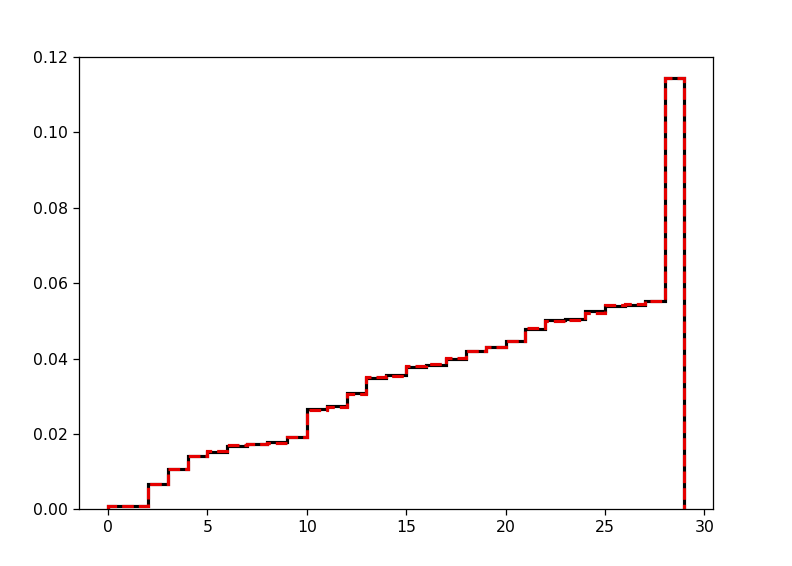

In [5]:
P=np.array([np.random.rand() for _ in range(30)])
P=P/sum(P)
P=P[np.argsort(P)]

N=1000000
# sample=[multinomial_rec(P,len(P)) for i in range(N)]
sample=[multinomial(P) for i in range(N)]

sample_np=[]
for _ in range(N):
    sample_np.append(np.nonzero(np.random.multinomial(1,P))[0][0])

    
    
    
fig=plt.figure(figsize=(7,5))
fig.subplots_adjust(bottom=0.1, left=0.1, top = 0.9, right=0.9,wspace=0.0,hspace=0.5)
sub = fig.add_subplot(111)


bins=range(len(P))
sub.hist(sample,bins=bins,density=True,edgecolor='xkcd:black',alpha=1,histtype='step',linestyle='-',linewidth=2)
sub.hist(sample_np,bins=bins,density=True,facecolor='1',histtype='step',edgecolor='xkcd:red',alpha=1,linestyle='--',linewidth=2)



# sub.set_xlim(0,1)
# sub.set_ylim(0,1) 
plt.show()